In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import datetime as dt

In [2]:


df = pd.read_csv("C://Users/zihyu/Desktop/새 폴더 (4)/최종2.csv", encoding = 'cp949')

df.head()

,base_month,emd_nm,em_cnt,pay_amt,em_t,area,em_area_cd_cnt,resid_reg_pop,foreign_pop,total_pop,d_visit_pop_cnt,l_visit_pop_cnt,s_visit_pop_cnt,pre_mm
0,1,건입동,18995.75,1302596.75,43.577912,2.53,30,9394.50,246.25,9640.75,25742.09,819.21,515.95,85.3
1,1,구좌읍,3706.25,345606.50,11.550862,185.93,104,15552.25,600.75,16153.00,27391.16,739.62,256.40,59.8
2,1,남원읍,12526.25,1594337.75,53.267950,188.71,51,18941.00,720.75,19661.75,30383.79,1325.47,785.10,69.9
3,1,노형동,114981.25,7516839.50,251.834550,45.21,161,54146.00,2079.50,56225.50,80644.43,2537.05,1758.83,79.2
4,1,대륜동,20368.25,1560047.00,52.893012,22.24,36,14229.75,199.75,14429.50,33917.93,704.69,243.59,70.8


In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
from scipy.stats import norm

In [4]:
def chauvenet_criterion(data):
    mean = np.mean(data)
    std = np.std(data,ddof=1)
 
    standardized_data = np.abs((data-mean)/std)
    p_val = (1-norm.cdf(standardized_data)) < 1/(4*len(data))
    if len(np.where(p_val==True)[0]) > 0:
        idx = np.where(p_val==True)[0]
        value = data[idx]
        return (idx, value)
    else:
        return False

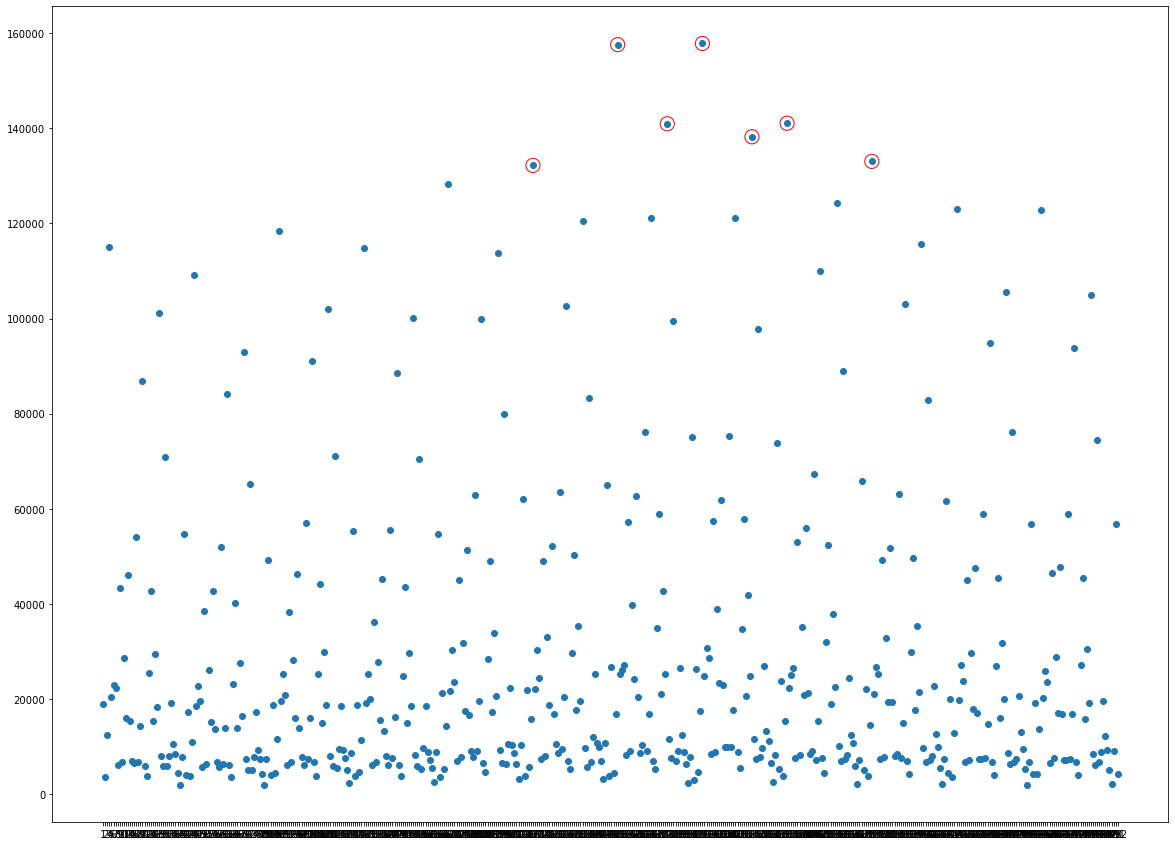

In [64]:
data = df['em_cnt']

res = chauvenet_criterion(data)

if res:
    fig = plt.figure(figsize=(20,15))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0],res[1],s=200,facecolor='none',edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print('There is no outlier')

In [65]:
res

(array([208, 249, 273, 290, 314, 331, 372], dtype=int64),
 208    132185.7500
 249    157570.6667
 273    140940.6667
 290    157823.3333
 314    138204.6667
 331    141050.6667
 372    133031.3333
 Name: em_cnt, dtype: float64)

In [60]:
corr = df.corr()

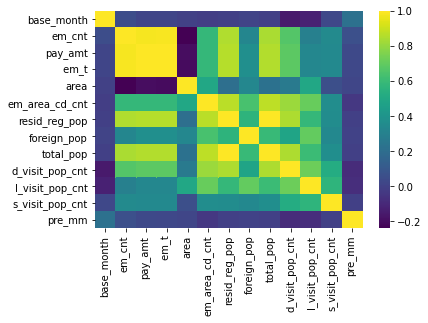

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, cmap='viridis')
plt.show()

In [69]:
data2=df.drop(['em_cnt','pay_amt'],axis=1)

In [70]:
data2

,base_month,emd_nm,em_t,area,em_area_cd_cnt,resid_reg_pop,foreign_pop,total_pop,d_visit_pop_cnt,l_visit_pop_cnt,s_visit_pop_cnt,pre_mm
0,1,건입동,43.577912,2.53,30,9394.50,246.25,9640.75,25742.09,819.21,515.95,85.3
1,1,구좌읍,11.550862,185.93,104,15552.25,600.75,16153.00,27391.16,739.62,256.40,59.8
2,1,남원읍,53.267950,188.71,51,18941.00,720.75,19661.75,30383.79,1325.47,785.10,69.9
3,1,노형동,251.834550,45.21,161,54146.00,2079.50,56225.50,80644.43,2537.05,1758.83,79.2
4,1,대륜동,52.893012,22.24,36,14229.75,199.75,14429.50,33917.93,704.69,243.59,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...
487,12,표선면,23.300217,135.16,47,12327.67,418.00,12745.67,15578.40,425.34,347.10,64.4
488,12,한경면,7.564783,79.10,70,9051.67,373.00,9424.67,8687.56,413.23,80.90,51.4
489,12,한림읍,32.497483,91.09,110,21307.67,3589.67,24897.33,22104.18,1549.58,362.10,60.7
490,12,화북동,113.141883,8.29,74,24765.33,395.00,25160.33,27358.73,250.39,35.78,58.0


In [71]:
data3 = data2.drop([18, 19, 25, 27, 59, 60, 68, 100, 101, 109, 141, 142, 182, 183, 191, 208, 223, 224, 232, 243, 265,
306, 312, 329, 330, 342, 344, 347, 388, 394, 428, 429,468, 470])

In [72]:
data3

,base_month,emd_nm,em_t,area,em_area_cd_cnt,resid_reg_pop,foreign_pop,total_pop,d_visit_pop_cnt,l_visit_pop_cnt,s_visit_pop_cnt,pre_mm
0,1,건입동,43.577912,2.53,30,9394.50,246.25,9640.75,25742.09,819.21,515.95,85.3
1,1,구좌읍,11.550862,185.93,104,15552.25,600.75,16153.00,27391.16,739.62,256.40,59.8
2,1,남원읍,53.267950,188.71,51,18941.00,720.75,19661.75,30383.79,1325.47,785.10,69.9
3,1,노형동,251.834550,45.21,161,54146.00,2079.50,56225.50,80644.43,2537.05,1758.83,79.2
4,1,대륜동,52.893012,22.24,36,14229.75,199.75,14429.50,33917.93,704.69,243.59,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...
487,12,표선면,23.300217,135.16,47,12327.67,418.00,12745.67,15578.40,425.34,347.10,64.4
488,12,한경면,7.564783,79.10,70,9051.67,373.00,9424.67,8687.56,413.23,80.90,51.4
489,12,한림읍,32.497483,91.09,110,21307.67,3589.67,24897.33,22104.18,1549.58,362.10,60.7
490,12,화북동,113.141883,8.29,74,24765.33,395.00,25160.33,27358.73,250.39,35.78,58.0


In [7]:
data3 = pd.read_csv("C://Users/zihyu/Desktop/새 폴더 (4)/최종3.csv", encoding = 'cp949')

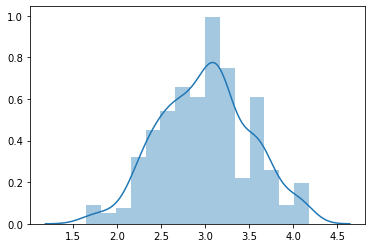

In [8]:
from scipy import stats
import seaborn as sns

df_boxcox = pd.Series(stats.boxcox(data3[' em_t'])[0])
sns.distplot(df_boxcox);

In [9]:
pd_df = pd.get_dummies(data3['emd_nm'])
df_result = pd.concat([data3, pd_df], axis=1)

In [10]:
df_result

,Unnamed: 0,base_month,emd_nm,em_t,area,em_area_cd_cnt,resid_reg_pop,foreign_pop,total_pop,d_visit_pop_cnt,...,정방동,조천읍,중문동,중앙동,천지동,표선면,한경면,한림읍,화북동,효돈동
0,0,1,건입동,43.577912,2.53,30,9394.50,246.25,9640.75,25742.09,...,0,0,0,0,0,0,0,0,0,0
1,1,1,구좌읍,11.550862,185.93,104,15552.25,600.75,16153.00,27391.16,...,0,0,0,0,0,0,0,0,0,0
2,2,1,남원읍,53.267950,188.71,51,18941.00,720.75,19661.75,30383.79,...,0,0,0,0,0,0,0,0,0,0
3,3,1,노형동,251.834550,45.21,161,54146.00,2079.50,56225.50,80644.43,...,0,0,0,0,0,0,0,0,0,0
4,4,1,대륜동,52.893012,22.24,36,14229.75,199.75,14429.50,33917.93,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,487,12,표선면,23.300217,135.16,47,12327.67,418.00,12745.67,15578.40,...,0,0,0,0,0,1,0,0,0,0
454,488,12,한경면,7.564783,79.10,70,9051.67,373.00,9424.67,8687.56,...,0,0,0,0,0,0,1,0,0,0
455,489,12,한림읍,32.497483,91.09,110,21307.67,3589.67,24897.33,22104.18,...,0,0,0,0,0,0,0,1,0,0
456,490,12,화북동,113.141883,8.29,74,24765.33,395.00,25160.33,27358.73,...,0,0,0,0,0,0,0,0,1,0
